In [1]:
"""Author: Charley Presigny
mail: charley.presigny@inria.fr
licence: Creative Commons BY 4.0"""
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ranksums

In [2]:
## MAIN DATA PATH(to add as prefix everywhere !!!)
main_path = "preprocessing/database/"
restore_path_suj = main_path+"sym_multistrength_SUJ/"
load_path_avg = main_path+"sym_multistrength_avgSUJ/sym_average_SUJ.dat_multistrength"
restore_path_pat = main_path+"sym_multistrength_PAT/"

## Test of significance for the diff in ROIS and frequencies

In [3]:
##Load the matrices and the related multistrength vectors
l_restore_path_suj = os.listdir(restore_path_suj)
l_restore_path_pat = os.listdir(restore_path_pat)
# Treat the healthy subject here
l_multidegree_ROI_suj = [] #the multistrength of a given node for all subjects 
l_multidegree_DS_ROI_suj = [] #the multistrength of a given layer for all subjects 
for path_multidegree in l_restore_path_suj:
    with open(restore_path_suj+path_multidegree, 'rb') as f: #open file 1
        dico = pickle.load(f)
    l_multidegree_ROI_suj.append(dico['multistrength'])
    l_multidegree_DS_ROI_suj.append(dico['multistrength_DS'])
l_multidegree_ROI_suj = np.array(l_multidegree_ROI_suj)
l_multidegree_DS_suj = np.array(l_multidegree_DS_ROI_suj)
# Treat the patients here
l_multidegree_ROI_pat = [] #the multistrength of a given node for all patients
l_multidegree_DS_pat = []
for path_multidegree in l_restore_path_pat:
    with open(restore_path_pat+path_multidegree, 'rb') as f: #open file 1
        dico = pickle.load(f)
        l_multidegree_ROI_pat.append(dico['multistrength'])
        l_multidegree_DS_pat.append(dico['multistrength_DS'])
l_multidegree_ROI_pat = np.array(l_multidegree_ROI_pat)
l_multidegree_DS_pat = np.array(l_multidegree_DS_pat)

In [4]:
# Make the difference between degree of each ROI and frequency to the average healthy subjects's multidegree vectors
#Load the multistrength vectors
with open(load_path_avg, 'rb') as f: 
    dico = pickle.load(f)
multistrength_1 = dico['multistrength']
multistrength_DS_1 = dico['multistrength_DS']

for i in range(len(l_multidegree_ROI_pat[0])):
    l_multidegree_ROI_suj[:,i] = (l_multidegree_ROI_suj[:,i] - multistrength_1[i])
    l_multidegree_ROI_pat[:,i] = (l_multidegree_ROI_pat[:,i] - multistrength_1[i])
for i in range(len(l_multidegree_DS_pat[0])):
    l_multidegree_DS_pat[:,i] = (l_multidegree_DS_pat[:,i] - multistrength_DS_1[i])
    l_multidegree_DS_suj[:,i] = (l_multidegree_DS_suj[:,i] - multistrength_DS_1[i])


In [5]:
threshold = 1.96 # Zscore threshold of statistical significance (Z = 1.96 equiv p=0.05)
l_ROI_ranksum_stat = [] #zscore of the ranksum for ROIs
l_p_ranksum = [] #pvalue
l_ROI_significant = []
for i in range(len(l_multidegree_ROI_pat[0])):
    res = ranksums(l_multidegree_ROI_pat[:,i],l_multidegree_ROI_suj[:,i])
    l_ROI_ranksum_stat.append(res.statistic)
    l_p_ranksum.append(res.pvalue)
    if abs(l_ROI_ranksum_stat[i]) > threshold:
        l_ROI_significant.append(i)

In [6]:
#Save the zscore of each region in a file for visualization
path = main_path+"ROI_significance.txt"
with open(path, 'w') as f: #open file 1
    for values in l_ROI_ranksum_stat:
        f.write(str(values)+"\n")
    f.close()

In [7]:
l_freq_ranksum_stat = [] #zscore of the ranksum for frequencies
l_p_freq_ranksum = []
l_freq_significant = []
for i in range(len(l_multidegree_DS_pat[0])):
    res = ranksums(l_multidegree_DS_pat[:,i],l_multidegree_DS_suj[:,i])
    l_freq_ranksum_stat.append(res.statistic)
    l_p_freq_ranksum.append(res.pvalue)
    if abs( l_freq_ranksum_stat[i]) > threshold:
        l_freq_significant.append(i)

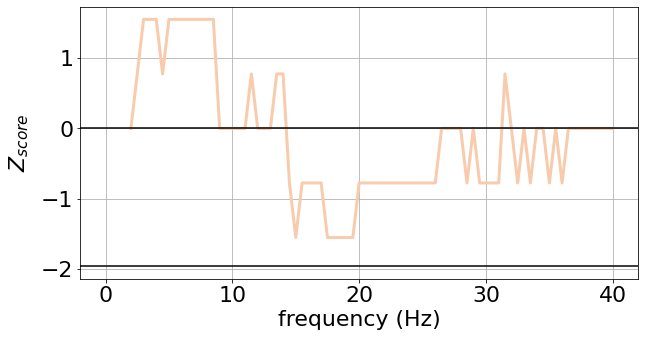

In [8]:
# Plot of the Zcore in function of 
l_frequency = [2 +i*0.5 for i in range(len(l_multidegree_DS_suj[0]))]
plt.figure(figsize=(10,5))
plt.rcParams.update({"font.size":22})
plt.plot(l_frequency,l_freq_ranksum_stat,color="#F8CBAD",alpha=1,linewidth=3)
plt.ylabel(r"$Z_{score}$",fontsize=22,labelpad=10)
plt.xlabel("frequency (Hz)",fontsize=22)
plt.axline([0,0],[40,0],color="black",linestyle='-')
plt.axline([0,-1.96],[40,-1.96],color="black",linestyle='-')
plt.grid()
plt.savefig(main_path+"frequency_disruption",transparent="True")
plt.show()